[*********************100%%**********************]  1 of 1 completed


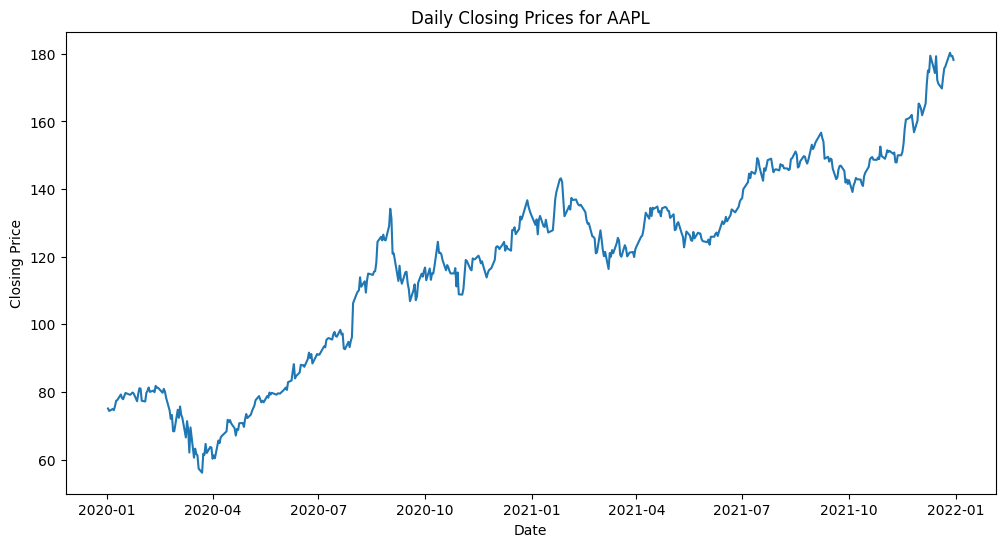

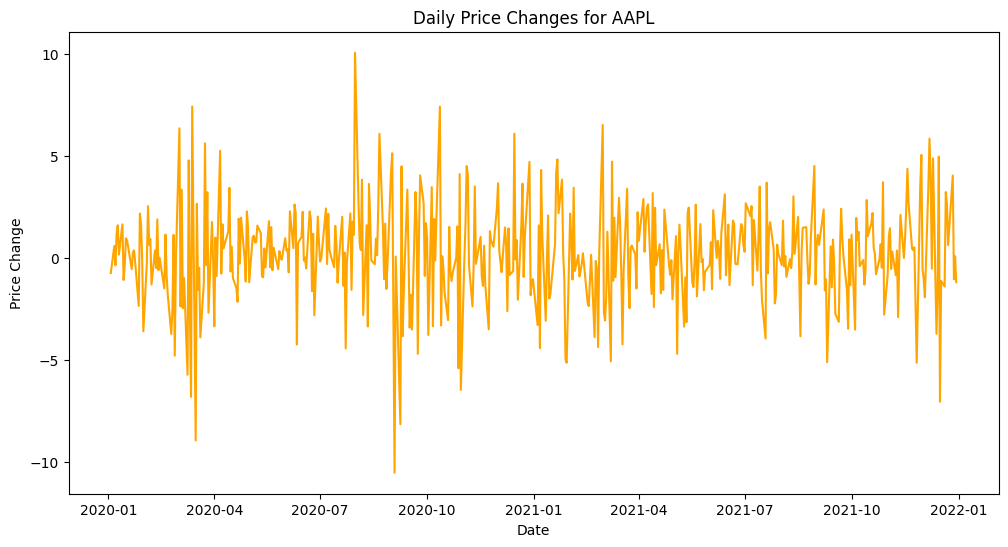

Accuracy: 0.5742574257425742
Confusion Matrix:
 [[ 0 43]
 [ 0 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.57      1.00      0.73        58

    accuracy                           0.57       101
   macro avg       0.29      0.50      0.36       101
weighted avg       0.33      0.57      0.42       101



/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_37149/556774491.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Trend'] = data['Price Change'].apply(lambda x: 1 if x > 0 else 0)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-12-31'

# Download stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)


# Perform exploratory data analysis (EDA)
# Plot daily closing prices
plt.figure(figsize=(12, 6))
plt.title(f'Daily Closing Prices for {stock_symbol}')
sns.lineplot(x=data.index, y=data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Calculate daily price changes and add them to the dataset
data['Price Change'] = data['Close'].diff()
data = data.dropna()

# Visualize daily price changes
plt.figure(figsize=(12, 6))
plt.title(f'Daily Price Changes for {stock_symbol}')
sns.lineplot(x=data.index, y=data['Price Change'], color='orange')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.show()

# Define a binary target variable for trend prediction
data['Trend'] = data['Price Change'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into features and target variable
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Trend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model for trend prediction
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_report_str)


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the stock symbols and date range
stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2020-01-01'
end_date = '2021-12-31'

# Create an empty DataFrame to store data for all stocks
all_data = pd.DataFrame()

# Download stock price data using yfinance for all stocks
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol
    all_data = pd.concat([all_data, data])

# Calculate daily price changes and add them to the dataset
all_data['Price Change'] = all_data.groupby('Symbol')['Close'].diff()
all_data = all_data.dropna()

# Define a binary target variable for trend prediction
all_data['Trend'] = all_data['Price Change'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into features and target variable
X = all_data[['Close']]  # Use only the 'Close' price as the feature
y = all_data['Trend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier for trend prediction
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Visualize the selected decision tree
estimator = model.estimators_[0]  # Choose a decision tree
plt.figure(figsize=(12, 6))
plt.title('Decision Tree Visualization')
plot_tree(estimator, feature_names=X.columns.tolist(), class_names=['Decrease', 'Increase'],
          filled=True, rounded=True, fontsize=10)
plt.show()

# Evaluate the model and visualize the confusion matrix
plt.figure(figsize=(6, 6))
plt.title('Confusion Matrix')
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_report_str)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


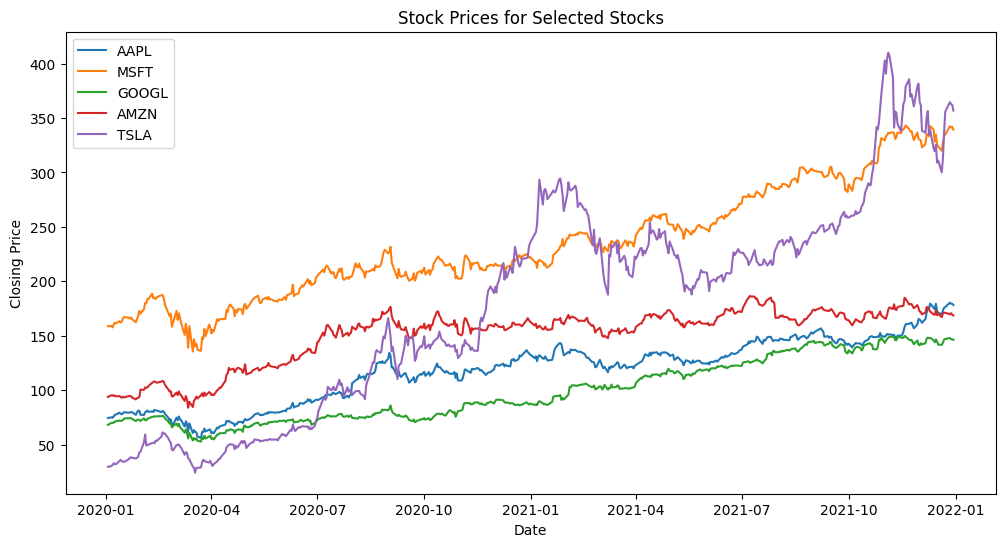

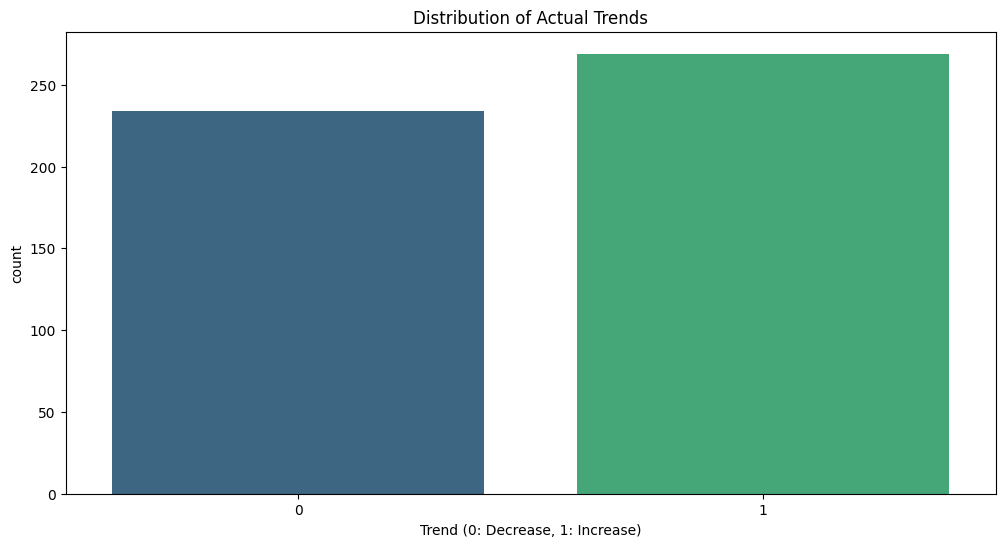

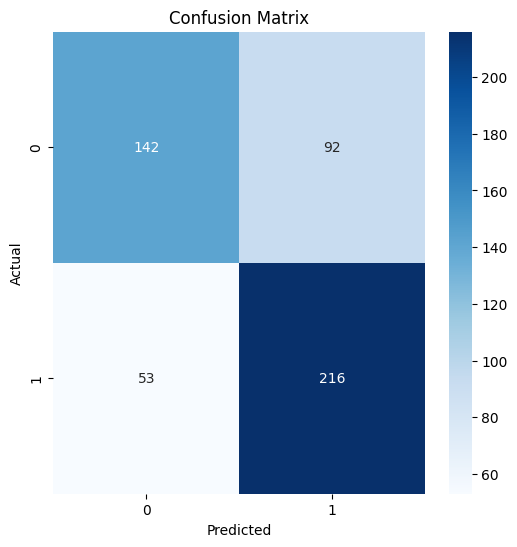

Accuracy: 0.7117296222664016
Confusion Matrix:
 [[142  92]
 [ 53 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66       234
           1       0.70      0.80      0.75       269

    accuracy                           0.71       503
   macro avg       0.71      0.70      0.71       503
weighted avg       0.71      0.71      0.71       503



In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the stock symbols and date range
stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2020-01-01'
end_date = '2021-12-31'

# Create an empty DataFrame to store data for all stocks
all_data = pd.DataFrame()

# Download stock price data using yfinance for all stocks
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol
    all_data = pd.concat([all_data, data])

# Calculate daily price changes and add them to the dataset
all_data['Price Change'] = all_data.groupby('Symbol')['Close'].diff()
all_data = all_data.dropna()

# Define a binary target variable for trend prediction
all_data['Trend'] = all_data['Price Change'].apply(lambda x: 1 if x > 0 else 0)

# Split the data into features and target variable
X = all_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = all_data['Trend']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier for trend prediction
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Visualizations
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    data = all_data[all_data['Symbol'] == symbol]
    plt.plot(data.index, data['Close'], label=symbol)

plt.title('Stock Prices for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=y_test, palette='viridis')
plt.title('Distribution of Actual Trends')
plt.xlabel('Trend (0: Decrease, 1: Increase)')
plt.show()

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification_report_str)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning

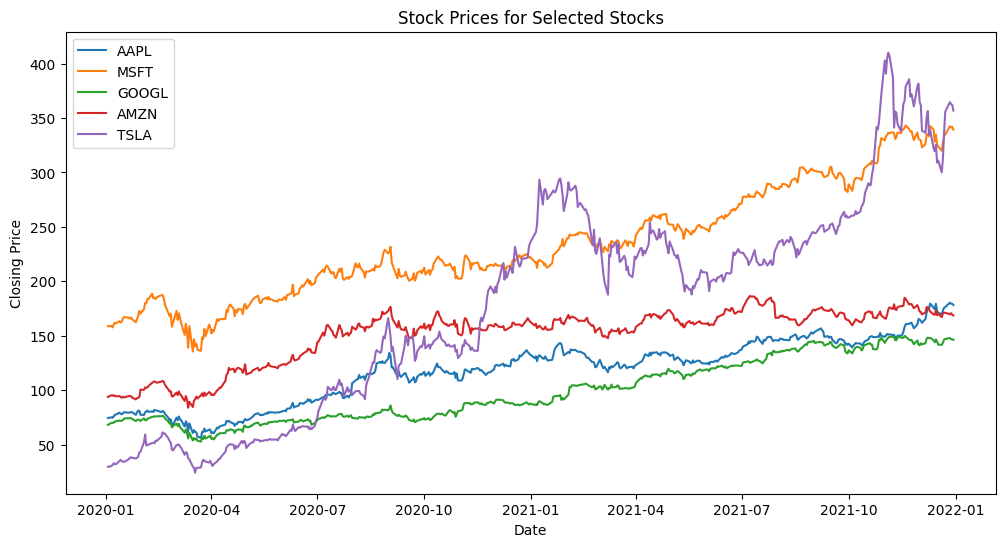

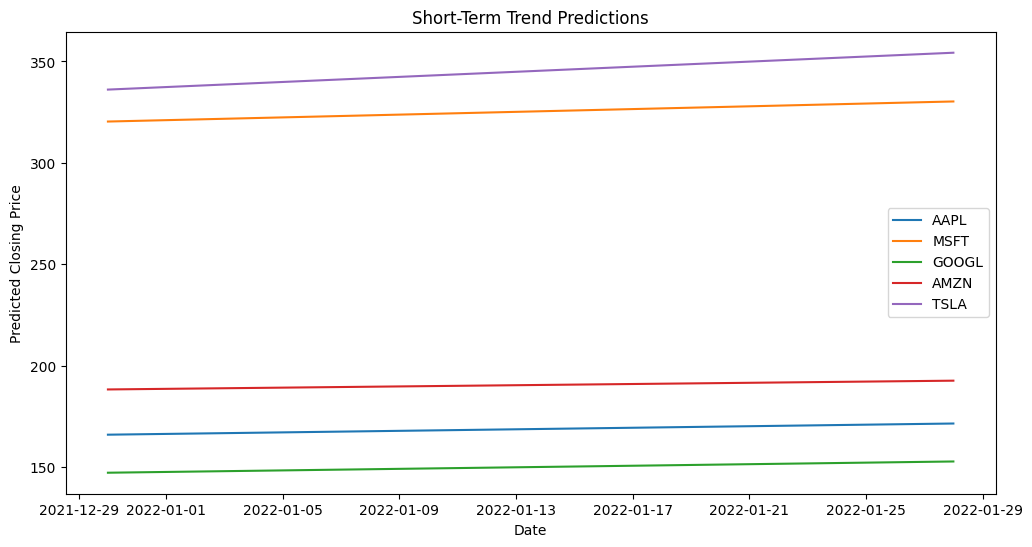

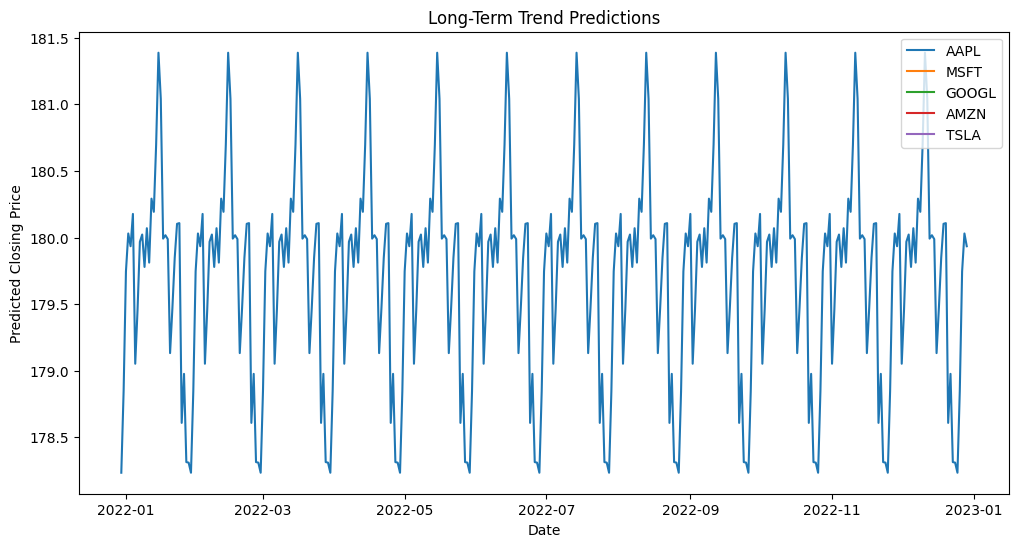

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score

# Define the stock symbols and date range
stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2020-01-01'
end_date = '2021-12-31'

# Create an empty DataFrame to store data for all stocks
all_data = pd.DataFrame()

# Download stock price data using yfinance for all stocks
for symbol in stock_symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    data['Symbol'] = symbol
    all_data = pd.concat([all_data, data])

# Calculate daily price changes and add them to the dataset
all_data['Price Change'] = all_data.groupby('Symbol')['Close'].diff()
all_data = all_data.dropna()

# Short-term trend prediction using Linear Regression
short_term_predictions = pd.DataFrame()
for symbol in stock_symbols:
    data = all_data[all_data['Symbol'] == symbol]
    X = np.arange(len(data)).reshape(-1, 1)
    y = data['Close']

    model = LinearRegression()
    model.fit(X, y)

    # Predict short-term trends (next 30 days)
    short_term_dates = pd.date_range(start=data.index[-1], periods=30)
    short_term_X = np.arange(len(data), len(data) + 30).reshape(-1, 1)
    short_term_predictions[symbol] = model.predict(short_term_X)
    short_term_predictions.index = short_term_dates

# Long-term trend prediction using Time Series forecasting
long_term_predictions = pd.DataFrame()
for symbol in stock_symbols:
    data = all_data[all_data['Symbol'] == symbol]
    data = data[['Close']]
    
    # Use Holt-Winters Exponential Smoothing for time series forecasting
    model = ExponentialSmoothing(data, seasonal='add', seasonal_periods=30)
    model_fit = model.fit(optimized=True)

    # Predict long-term trends (next 365 days)
    long_term_dates = pd.date_range(start=data.index[-1], periods=365)
    long_term_predictions[symbol] = model_fit.forecast(365)
    long_term_predictions.index = long_term_dates

# Visualizations
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    data = all_data[all_data['Symbol'] == symbol]
    plt.plot(data.index, data['Close'], label=symbol)

plt.title('Stock Prices for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Short-term Predictions Visualization
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(short_term_predictions.index, short_term_predictions[symbol], label=symbol)

plt.title('Short-Term Trend Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()

# Long-term Predictions Visualization
plt.figure(figsize=(12, 6))
for symbol in stock_symbols:
    plt.plot(long_term_predictions.index, long_term_predictions[symbol], label=symbol)

plt.title('Long-Term Trend Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


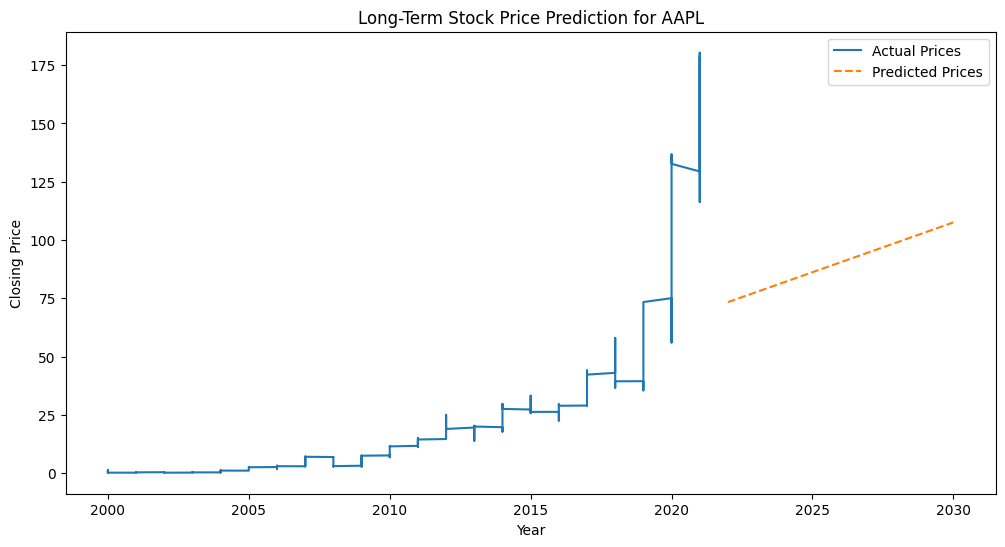

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the stock symbol and date range for long-term prediction
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'  # Historical data until 2021

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract relevant features and target variable
data['Date'] = data.index
data['Year'] = data['Date'].dt.year
X = data[['Year']]
y = data['Close']

# Train a linear regression model for long-term prediction
model = LinearRegression()
model.fit(X, y)

# Generate future years for prediction (up to 2030)
future_years = np.arange(2022, 2031).reshape(-1, 1)

# Predict future closing prices
predicted_prices = model.predict(future_years)

# Visualize the long-term prediction
plt.figure(figsize=(12, 6))
plt.title(f'Long-Term Stock Price Prediction for {stock_symbol}')
plt.plot(data['Year'], data['Close'], label='Actual Prices')
plt.plot(future_years, predicted_prices, label='Predicted Prices', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


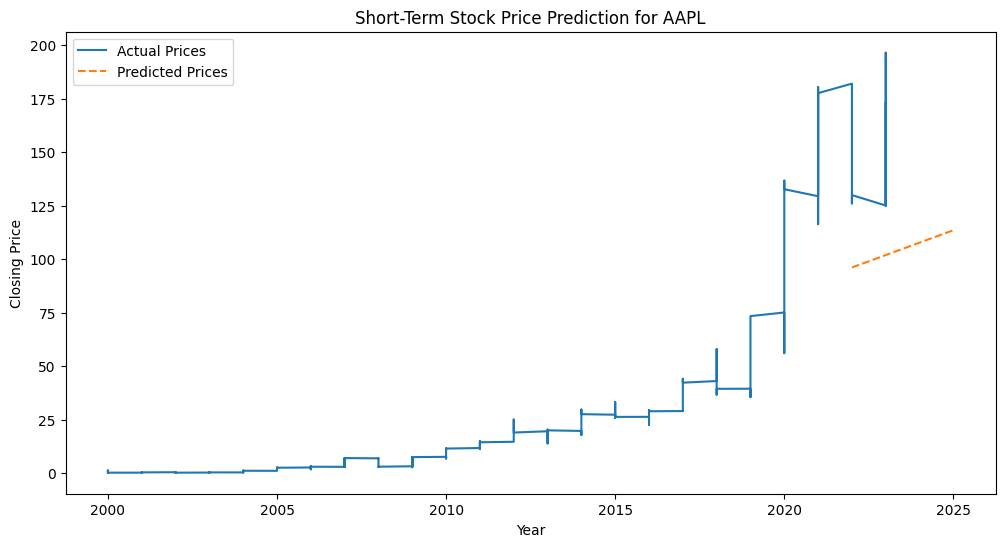

In [7]:
# Define the date range for short-term prediction
short_term_end_date = '2025-12-31'  # Short-term prediction until 2025

# Download historical stock price data using yfinance for short-term prediction
data_short_term = yf.download(stock_symbol, start=start_date, end=short_term_end_date)

# Extract relevant features and target variable
data_short_term['Date'] = data_short_term.index
data_short_term['Year'] = data_short_term['Date'].dt.year
X_short_term = data_short_term[['Year']]
y_short_term = data_short_term['Close']

# Train a linear regression model for short-term prediction
model_short_term = LinearRegression()
model_short_term.fit(X_short_term, y_short_term)

# Generate future years for short-term prediction (up to 2025)
future_years_short_term = np.arange(2022, 2026).reshape(-1, 1)

# Predict short-term closing prices
predicted_prices_short_term = model_short_term.predict(future_years_short_term)

# Visualize the short-term prediction
plt.figure(figsize=(12, 6))
plt.title(f'Short-Term Stock Price Prediction for {stock_symbol}')
plt.plot(data_short_term['Year'], data_short_term['Close'], label='Actual Prices')
plt.plot(future_years_short_term, predicted_prices_short_term, label='Predicted Prices', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_37149/2066590283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data)


Epoch 1/100
137/137 [==============================] - 4s 18ms/step - loss: 2.4011e-04
Epoch 2/100
137/137 [==============================] - 2s 18ms/step - loss: 9.5963e-06
Epoch 3/100
137/137 [==============================] - 2s 18ms/step - loss: 9.1495e-06
Epoch 4/100
137/137 [==============================] - 2s 18ms/step - loss: 8.6372e-06
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 8.1004e-06
Epoch 6/100
137/137 [==============================] - 3s 19ms/step - loss: 8.6108e-06
Epoch 7/100
137/137 [==============================] - 3s 18ms/step - loss: 8.1143e-06
Epoch 8/100
137/137 [==============================] - 3s 19ms/step - loss: 1.0029e-05
Epoch 9/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2596e-06
Epoch 10/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2096e-06
Epoch 11/100
137/137 [==============================] - 3s 19ms/step - loss: 8.3456e-06
Epoch 12/100
137/137 [===================

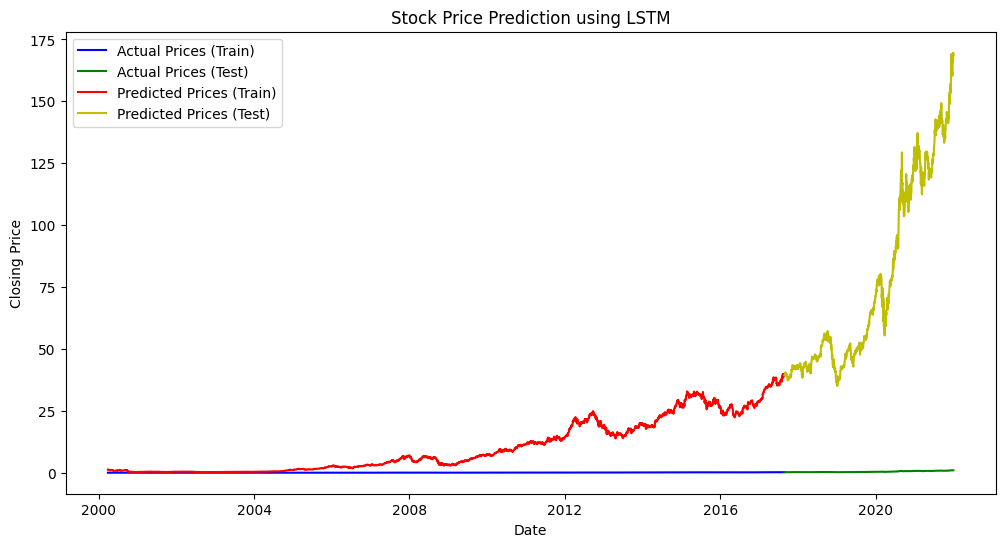

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stock symbol and date range for data retrieval
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'  # Historical data until 2021

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract and normalize the 'Close' prices
data = data[['Close']]
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data)

# Define the look-back window size for LSTM
look_back = 60  # Adjust as needed

# Create sequences of data for training
X, y = [], []
for i in range(look_back, len(data)):
    X.append(data.iloc[i - look_back:i, 0])
    y.append(data.iloc[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transform predictions back to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Visualize the training and testing predictions
train_size = len(data) - len(y_test)
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction using LSTM')
plt.plot(data.index[look_back:train_size], data['Close'][look_back:train_size], label='Actual Prices (Train)', color='b')
plt.plot(data.index[train_size:], data['Close'][train_size:], label='Actual Prices (Test)', color='g')
plt.plot(data.index[look_back:train_size], train_predictions, label='Predicted Prices (Train)', color='r')
plt.plot(data.index[train_size:], test_predictions, label='Predicted Prices (Test)', color='y')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_37149/2066590283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data)


Epoch 1/100
137/137 [==============================] - 4s 18ms/step - loss: 2.4011e-04
Epoch 2/100
137/137 [==============================] - 2s 18ms/step - loss: 9.5963e-06
Epoch 3/100
137/137 [==============================] - 2s 18ms/step - loss: 9.1495e-06
Epoch 4/100
137/137 [==============================] - 2s 18ms/step - loss: 8.6372e-06
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 8.1004e-06
Epoch 6/100
137/137 [==============================] - 3s 19ms/step - loss: 8.6108e-06
Epoch 7/100
137/137 [==============================] - 3s 18ms/step - loss: 8.1143e-06
Epoch 8/100
137/137 [==============================] - 3s 19ms/step - loss: 1.0029e-05
Epoch 9/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2596e-06
Epoch 10/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2096e-06
Epoch 11/100
137/137 [==============================] - 3s 19ms/step - loss: 8.3456e-06
Epoch 12/100
137/137 [===================

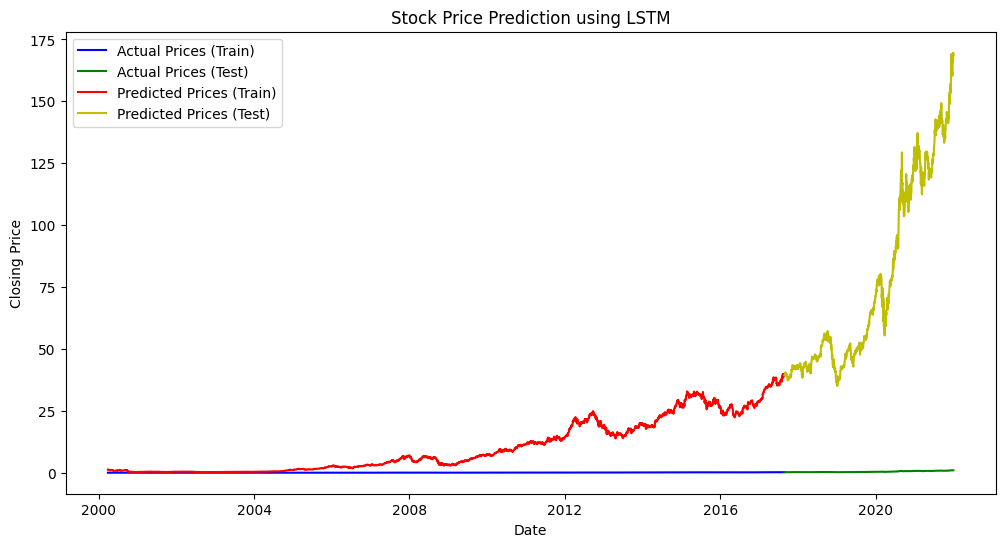

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stock symbol and date range for data retrieval
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'  # Historical data until 2021

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract and normalize the 'Close' prices
data = data[['Close']]
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data)

# Define the look-back window size for LSTM
look_back = 60  # Adjust as needed

# Create sequences of data for training
X, y = [], []
for i in range(look_back, len(data)):
    X.append(data.iloc[i - look_back:i, 0])
    y.append(data.iloc[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transform predictions back to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Visualize the training and testing predictions
train_size = len(data) - len(y_test)
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction using LSTM')
plt.plot(data.index[look_back:train_size], data['Close'][look_back:train_size], label='Actual Prices (Train)', color='b')
plt.plot(data.index[train_size:], data['Close'][train_size:], label='Actual Prices (Test)', color='g')
plt.plot(data.index[look_back:train_size], train_predictions, label='Predicted Prices (Train)', color='r')
plt.plot(data.index[train_size:], test_predictions, label='Predicted Prices (Test)', color='y')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_37149/2066590283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data)


Epoch 1/100
137/137 [==============================] - 4s 18ms/step - loss: 2.4011e-04
Epoch 2/100
137/137 [==============================] - 2s 18ms/step - loss: 9.5963e-06
Epoch 3/100
137/137 [==============================] - 2s 18ms/step - loss: 9.1495e-06
Epoch 4/100
137/137 [==============================] - 2s 18ms/step - loss: 8.6372e-06
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 8.1004e-06
Epoch 6/100
137/137 [==============================] - 3s 19ms/step - loss: 8.6108e-06
Epoch 7/100
137/137 [==============================] - 3s 18ms/step - loss: 8.1143e-06
Epoch 8/100
137/137 [==============================] - 3s 19ms/step - loss: 1.0029e-05
Epoch 9/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2596e-06
Epoch 10/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2096e-06
Epoch 11/100
137/137 [==============================] - 3s 19ms/step - loss: 8.3456e-06
Epoch 12/100
137/137 [===================

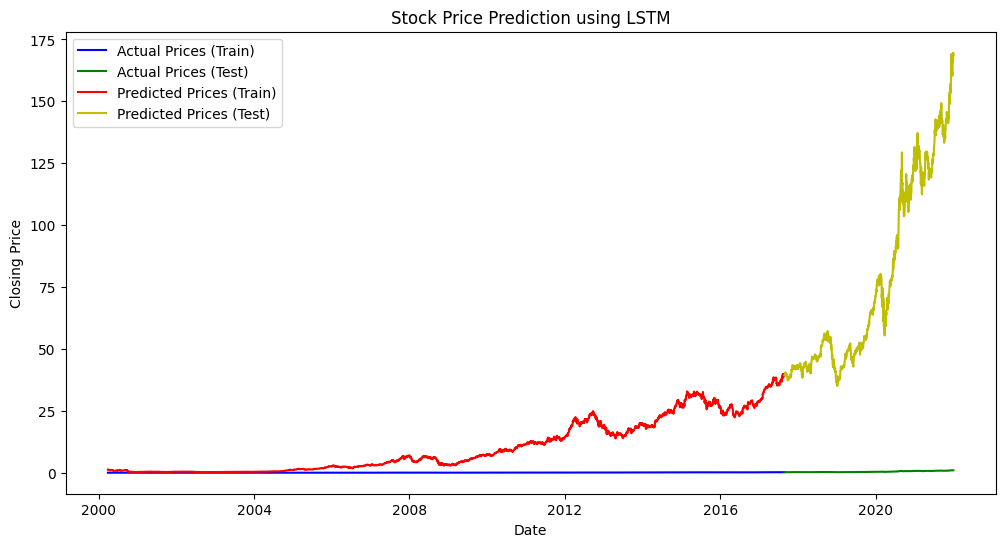

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stock symbol and date range for data retrieval
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'  # Historical data until 2021

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract and normalize the 'Close' prices
data = data[['Close']]
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data)

# Define the look-back window size for LSTM
look_back = 60  # Adjust as needed

# Create sequences of data for training
X, y = [], []
for i in range(look_back, len(data)):
    X.append(data.iloc[i - look_back:i, 0])
    y.append(data.iloc[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transform predictions back to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Visualize the training and testing predictions
train_size = len(data) - len(y_test)
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction using LSTM')
plt.plot(data.index[look_back:train_size], data['Close'][look_back:train_size], label='Actual Prices (Train)', color='b')
plt.plot(data.index[train_size:], data['Close'][train_size:], label='Actual Prices (Test)', color='g')
plt.plot(data.index[look_back:train_size], train_predictions, label='Predicted Prices (Train)', color='r')
plt.plot(data.index[train_size:], test_predictions, label='Predicted Prices (Test)', color='y')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed


/var/folders/df/cjrh6jqs3w90375f4bscv80r0000gn/T/ipykernel_37149/2066590283.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data)


Epoch 1/100
137/137 [==============================] - 4s 18ms/step - loss: 2.4011e-04
Epoch 2/100
137/137 [==============================] - 2s 18ms/step - loss: 9.5963e-06
Epoch 3/100
137/137 [==============================] - 2s 18ms/step - loss: 9.1495e-06
Epoch 4/100
137/137 [==============================] - 2s 18ms/step - loss: 8.6372e-06
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 8.1004e-06
Epoch 6/100
137/137 [==============================] - 3s 19ms/step - loss: 8.6108e-06
Epoch 7/100
137/137 [==============================] - 3s 18ms/step - loss: 8.1143e-06
Epoch 8/100
137/137 [==============================] - 3s 19ms/step - loss: 1.0029e-05
Epoch 9/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2596e-06
Epoch 10/100
137/137 [==============================] - 3s 18ms/step - loss: 8.2096e-06
Epoch 11/100
137/137 [==============================] - 3s 19ms/step - loss: 8.3456e-06
Epoch 12/100
137/137 [===================

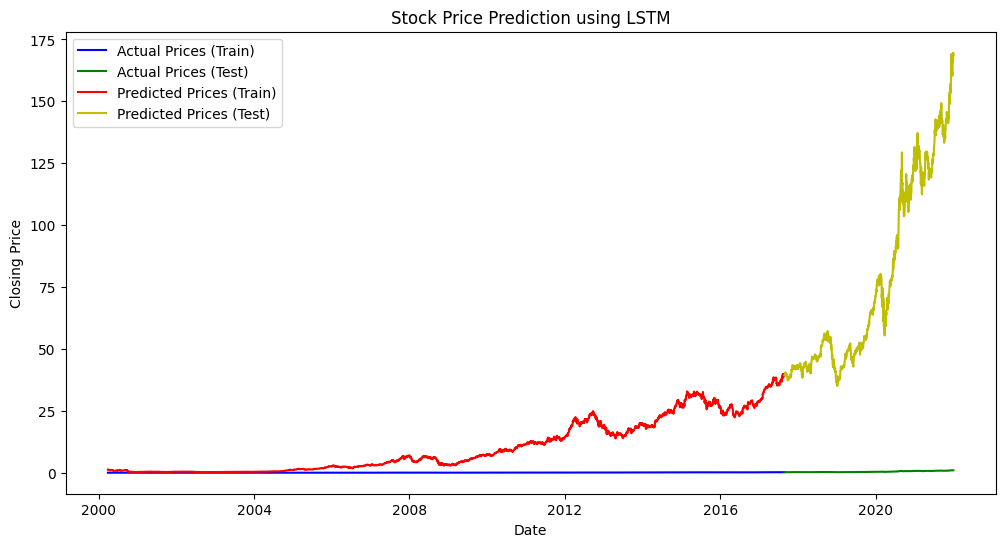

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the stock symbol and date range for data retrieval
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'  # Historical data until 2021

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract and normalize the 'Close' prices
data = data[['Close']]
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data)

# Define the look-back window size for LSTM
look_back = 60  # Adjust as needed

# Create sequences of data for training
X, y = [], []
for i in range(look_back, len(data)):
    X.append(data.iloc[i - look_back:i, 0])
    y.append(data.iloc[i, 0])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the data for LSTM input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build an LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transform predictions back to the original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Visualize the training and testing predictions
train_size = len(data) - len(y_test)
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction using LSTM')
plt.plot(data.index[look_back:train_size], data['Close'][look_back:train_size], label='Actual Prices (Train)', color='b')
plt.plot(data.index[train_size:], data['Close'][train_size:], label='Actual Prices (Test)', color='g')
plt.plot(data.index[look_back:train_size], train_predictions, label='Predicted Prices (Train)', color='r')
plt.plot(data.index[train_size:], test_predictions, label='Predicted Prices (Test)', color='y')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
Epoch 1/100
4418/4418 - 2s - loss: 1.1097e-04 - 2s/epoch - 468us/step
Epoch 2/100
4418/4418 - 2s - loss: 9.8884e-06 - 2s/epoch - 362us/step
Epoch 3/100
4418/4418 - 2s - loss: 8.9735e-06 - 2s/epoch - 361us/step
Epoch 4/100
4418/4418 - 2s - loss: 8.2735e-06 - 2s/epoch - 361us/step
Epoch 5/100
4418/4418 - 2s - loss: 7.9672e-06 - 2s/epoch - 361us/step
Epoch 6/100
4418/4418 - 2s - loss: 7.2412e-06 - 2s/epoch - 362us/step
Epoch 7/100
4418/4418 - 2s - loss: 6.7454e-06 - 2s/epoch - 360us/step
Epoch 8/100
4418/4418 - 2s - loss: 6.1054e-06 - 2s/epoch - 359us/step
Epoch 9/100
4418/4418 - 2s - loss: 5.4854e-06 - 2s/epoch - 358us/step
Epoch 10/100
4418/4418 - 2s - loss: 5.0932e-06 - 2s/epoch - 354us/step
Epoch 11/100
4418/4418 - 2s - loss: 5.2067e-06 - 2s/epoch - 350us/step
Epoch 12/100
4418/4418 - 2s - loss: 5.1085e-06 - 2s/epoch - 349us/step
Epoch 13/100
4418/4418 - 2s - loss: 4.8317e-06 - 2s/epoch - 351us/step
Epoch 14/100
4418

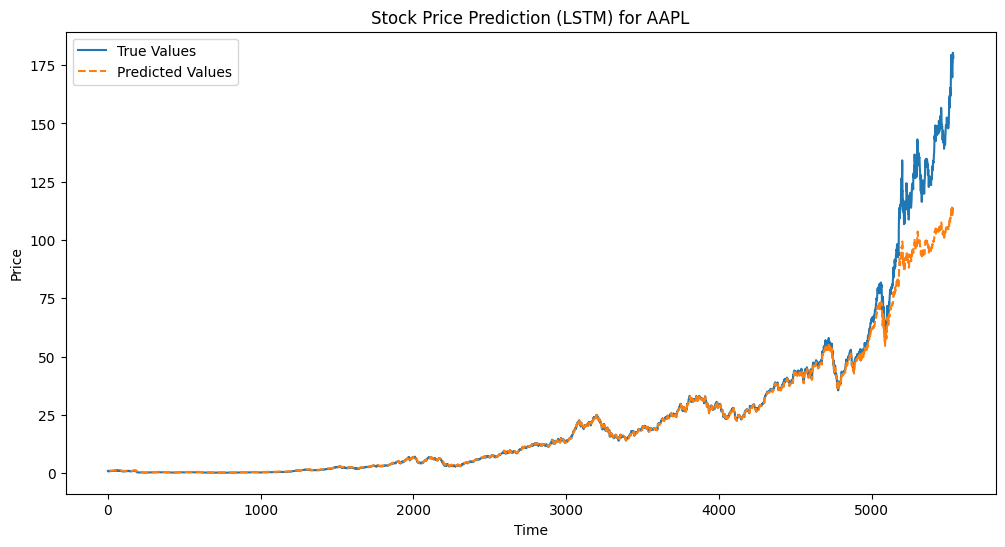

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Define the stock symbol and date range
stock_symbol = 'AAPL'
start_date = '2000-01-01'
end_date = '2021-12-31'

# Download historical stock price data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices for prediction
data = data[['Close']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(data) * 0.80)
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

# Define a function to create sequences for LSTM
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_sequences(train_data, look_back)
testX, testY = create_sequences(test_data, look_back)

# Reshape data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the scaled data to the original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))

print(f'Train RMSE: {trainScore:.2f}')
print(f'Test RMSE: {testScore:.2f}')

# Create a dataset with true values and predicted values
true_and_pred = np.empty_like(data)
true_and_pred[:, :] = np.nan
true_and_pred[look_back:len(trainPredict)+look_back, :] = trainPredict

# Adjust the range to match the size of testPredict
true_and_pred[len(trainPredict)+(look_back*2):len(trainPredict)+(look_back*2) + len(testPredict), :] = testPredict

# Visualize true values vs. predicted values
plt.figure(figsize=(12, 6))
plt.title(f'Stock Price Prediction (LSTM) for {stock_symbol}')
plt.plot(scaler.inverse_transform(data), label='True Values')
plt.plot(true_and_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

